In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

bins = np.arange(0, 12, 0.5)
c_store_prices = pd.read_csv('CSV/c_store.csv')
c_store_prices['ID'] = c_store_prices.index

print(c_store_prices.head())
plt.subplots()
high_price = 5.49
low_price = 3.99
prices = c_store_prices[(c_store_prices['Price'] <= high_price) & (c_store_prices['Price'] >= low_price)]
#plt.hist(c_store_prices["Price"], bins=bins, edgecolor='black')
sns.scatterplot(data=prices, x='Abbreviation', y='Price')
plt.title(f"Items from \\${low_price} to \\${high_price}")
plt.xlabel("Item")
plt.xticks(rotation=60)
plt.show()

print(c_store_prices.max())
print(c_store_prices.loc[c_store_prices['ID'] == 1])

T-statistic: 8.180126378753894, P-value: 1.110012700229017e-12


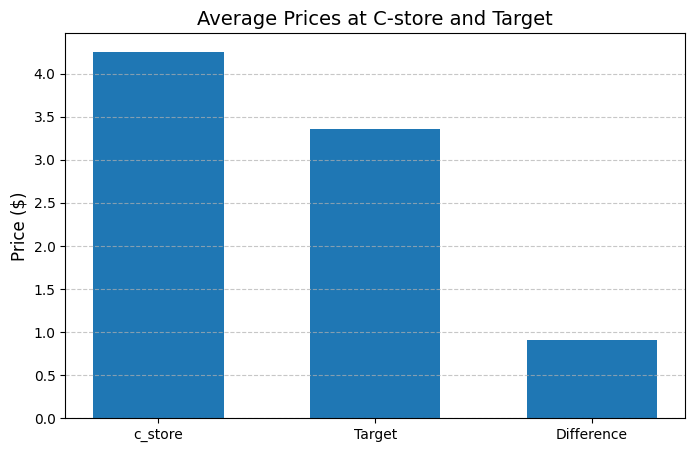

'\n# Line Graph visualization\nmerged_df.sort_values(\'Item\', inplace=True)\nplt.figure(figsize=(12, 6))\nplt.plot(merged_df[\'Item\'], merged_df[\'Price_c_store\'], marker=\'o\', label=\'c_store Price\', linestyle=\'--\')\nplt.plot(merged_df[\'Item\'], merged_df[\'Price_target\'], marker=\'o\', label=\'Target Price\', linestyle=\'--\')\nplt.fill_between(merged_df[\'Item\'], merged_df[\'Price_c_store\'], merged_df[\'Price_target\'], alpha=0.2, label=\'Difference\')\nplt.title("Price Comparison: c-store vs. Target", fontsize=16)\nplt.xlabel("Items", fontsize=12)\nplt.ylabel("Price ($)", fontsize=12)\nplt.xticks(rotation=45, fontsize=10)\nplt.yticks(fontsize=10)\nplt.legend(fontsize=12)\nplt.grid(axis=\'y\', linestyle=\'--\', alpha=0.7)\n\nplt.tight_layout()\nplt.show()\n\n# Side-by-Side Bar Chart visualization\nmerged_df.sort_values(\'Item\', inplace=True)\n\nplt.figure(figsize=(12, 6))\nbar_width = 0.4\nx_positions = range(len(merged_df))\n\nplt.bar([x - bar_width / 2 for x in x_posit

In [16]:
# T-Test and Whole Group Visualization

from scipy.stats import ttest_rel
target_prices = pd.read_csv('CSV/target.csv')

# Merged dataframe on items while keeping price different between the two
merged_df = pd.merge(
    c_store_prices[['Item', 'Price']].rename(columns={'Price': 'Price_c_store'}),
    target_prices[['Item', 'Price']].rename(columns={'Price': 'Price_target'}),
    on='Item'
)

# Merged dataframe new column called 'Price_Difference' with the difference between c-store prices and target prices
# Positive means (c-store price > target price) for an item
merged_df['Price_Difference'] = merged_df['Price_c_store'] - merged_df['Price_target']
t_stat, p_value = ttest_rel(merged_df['Price_c_store'], merged_df['Price_target'])
print(f"T-statistic: {t_stat}, P-value: {p_value}")

avg_prices = {
    "c_store": merged_df['Price_c_store'].mean(),
    "Target": merged_df['Price_target'].mean(),
    "Difference": merged_df['Price_Difference'].mean()
}


# Histogram visualization
plt.figure(figsize=(8, 5))
plt.bar(avg_prices.keys(), avg_prices.values(), width=0.6)
plt.title("Average Prices at C-store and Target", fontsize=14)
plt.ylabel("Price ($)", fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.show()

'''
# Line Graph visualization
merged_df.sort_values('Item', inplace=True)
plt.figure(figsize=(12, 6))
plt.plot(merged_df['Item'], merged_df['Price_c_store'], marker='o', label='c_store Price', linestyle='--')
plt.plot(merged_df['Item'], merged_df['Price_target'], marker='o', label='Target Price', linestyle='--')
plt.fill_between(merged_df['Item'], merged_df['Price_c_store'], merged_df['Price_target'], alpha=0.2, label='Difference')
plt.title("Price Comparison: c-store vs. Target", fontsize=16)
plt.xlabel("Items", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

plt.tight_layout()
plt.show()

# Side-by-Side Bar Chart visualization
merged_df.sort_values('Item', inplace=True)

plt.figure(figsize=(12, 6))
bar_width = 0.4
x_positions = range(len(merged_df))

plt.bar([x - bar_width / 2 for x in x_positions], merged_df['Price_c_store'], 
        bar_width, label='c-store Price', color='orange')
plt.bar([x + bar_width / 2 for x in x_positions], merged_df['Price_target'], 
        bar_width, label='Target Price', color='skyblue')

plt.title("Side-by-Side Bar Chart: Price Comparison (c-store vs. Target)", fontsize=16)
plt.xlabel("Items", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.xticks(x_positions, merged_df['Item'], rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()
'''


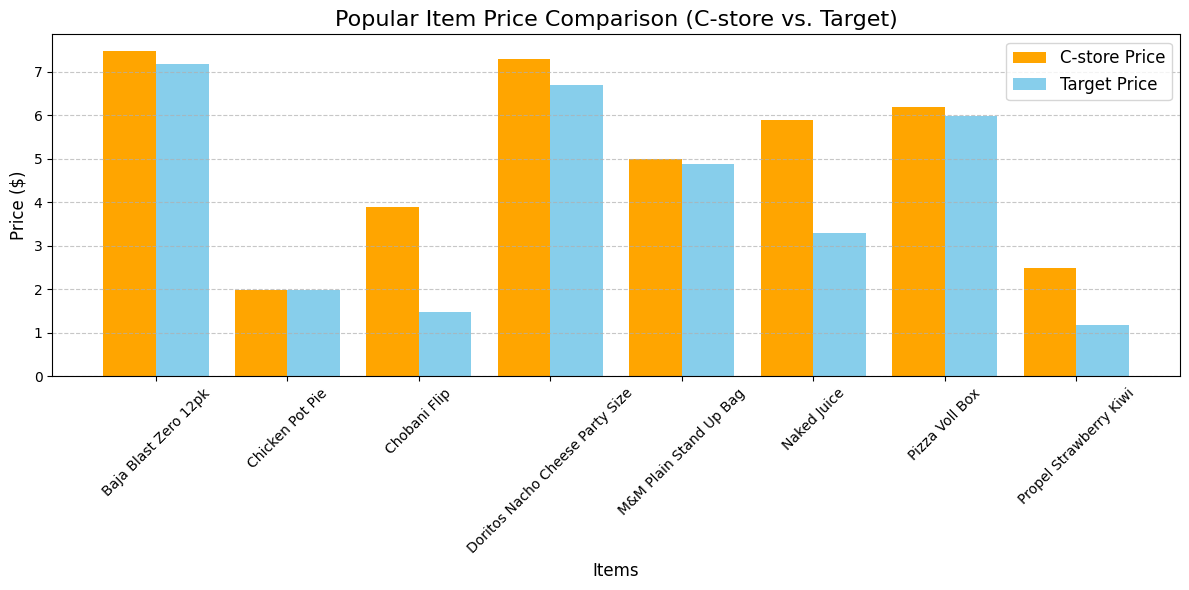

In [13]:
# Popular Item visualization
popular_target_prices = pd.read_csv('CSV/tpopular.csv')
popular_c_store_prices = pd.read_csv('CSV/cpopular.csv')

merged_popular_df = pd.merge(
    popular_c_store_prices[['Item', 'Price']].rename(columns={'Price': 'Price_c_store'}),
    popular_target_prices[['Item', 'Price']].rename(columns={'Price': 'Price_target'}),
    on='Item'
)

merged_popular_df.sort_values('Item', inplace=True)

plt.figure(figsize=(12, 6))
bar_width = 0.4
x_positions = range(len(merged_popular_df))

plt.bar([x - bar_width / 2 for x in x_positions], merged_popular_df['Price_c_store'], 
        bar_width, label='C-store Price', color='orange')
plt.bar([x + bar_width / 2 for x in x_positions], merged_popular_df['Price_target'], 
        bar_width, label='Target Price', color='skyblue')

plt.title("Popular Item Price Comparison (C-store vs. Target)", fontsize=16)
plt.xlabel("Items", fontsize=12)
plt.ylabel("Price ($)", fontsize=12)
plt.xticks(x_positions, merged_popular_df['Item'], rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.legend(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()